In [1]:
# Install necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preparation

In [3]:
# a. Import necessary dataset

data = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data science & ML/Unsupervised Machine Learning/Data/wholesale_clients.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# b. Remove the Channel (restaurant, hotel, etc.) and Region columns since they are not fields we want to model on
data = data.iloc[:, 2:]
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [5]:
# c. Note the number of rows and columns
data.shape

(440, 6)

In [6]:
# d. Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [7]:
# e. Double check that all the column means are 0 and standard deviations are 1
data_scaled.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


# 2. Kmeans Clustering

In [8]:
# a. Import KMeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans

# create an empty list to hold many inertia values
inertia_values = []

# create 2 - 15 clusters, and add the intertia scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

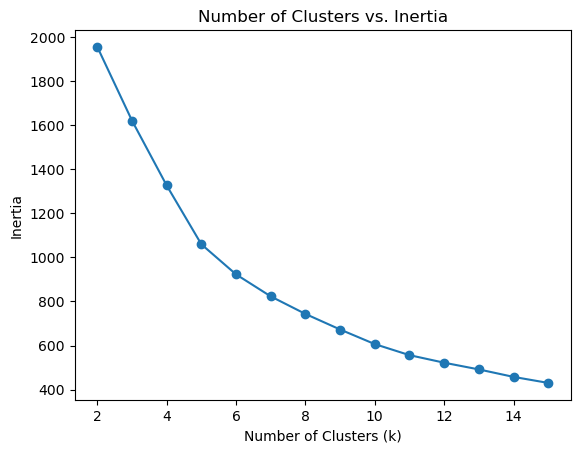

In [9]:
# b. Create an inertia plot

# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2, 16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

In [10]:
# c. Identify the elbow of the plot and fit a KMeans model just for that number of clusters
# Looks like the elbow is around 5 clusters
kmeans5 = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans5.fit(data_scaled)

C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5, n_init='auto', random_state=42)

In [11]:
# d. Find the number of clients in each cluster
from collections import Counter

Counter(kmeans5.labels_)

Counter({2: 269, 0: 96, 4: 63, 1: 11, 3: 1})

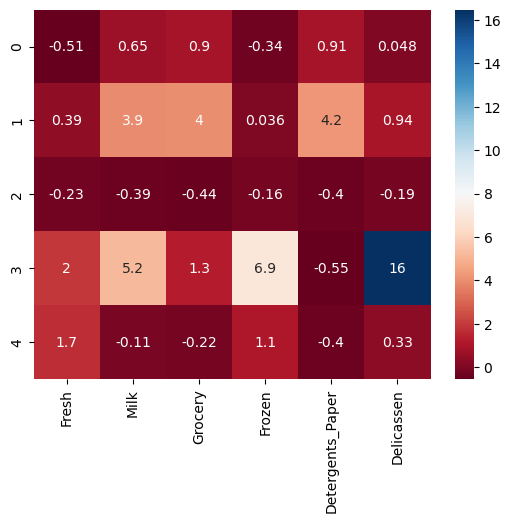

In [12]:
# e. Create a heat map of the cluster centers
import seaborn as sns

cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers5, cmap='RdBu', annot=True);

In [ ]:
# f. Name the clusters

# cluster 1 : More Milk , Grocery and Detergents_paper
# Cluster 2 : More Milk , Grocery , Detergents_paper and Delicassen
# Cluster 3 : Little of everything
# Cluster 4 : High all but Detergents_paper
# Cluster 5 : High Fresh , frozen and Delicassen

In [13]:
# Experiment1. Identify the elbow of the plot and fit a KMeans model just for that number of clusters
# Looks like the elbow is around 5 clusters
kmeans4 = KMeans(n_clusters=4, n_init='auto', random_state=42)
kmeans4.fit(data_scaled)

C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=42)

In [15]:
# d. Find the number of clients in each cluster
from collections import Counter

Counter(kmeans4.labels_)

Counter({2: 318, 0: 109, 1: 12, 3: 1})

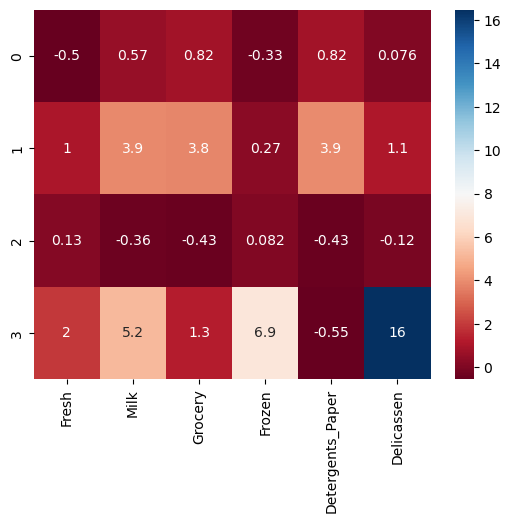

In [16]:
# e. Create a heat map of the cluster centers
import seaborn as sns

cluster_centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers4, cmap='RdBu', annot=True);

In [17]:
# Experiment2. Identify the elbow of the plot and fit a KMeans model just for that number of clusters
# Looks like the elbow is around 5 clusters
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data_scaled)

C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=42)

In [18]:
# Find the number of clients in each cluster
from collections import Counter

Counter(kmeans3.labels_)

Counter({2: 318, 0: 109, 1: 13})

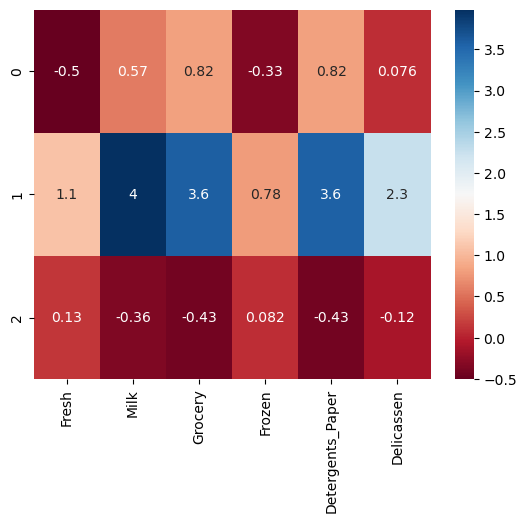

In [19]:
# e. Create a heat map of the cluster centers
import seaborn as sns

cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

In [ ]:
# Leveraging silhoutte score to identify number of clusters 

In [20]:
# g. create a silhouette scores plot instead of an inertia plot

from sklearn.metrics import silhouette_score

# create an empty list to hold many silhouette score values
silhouette_scores = []

# create 2 - 15 clusters, and add the silhouette scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_, metric='euclidean', sample_size=None))

C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

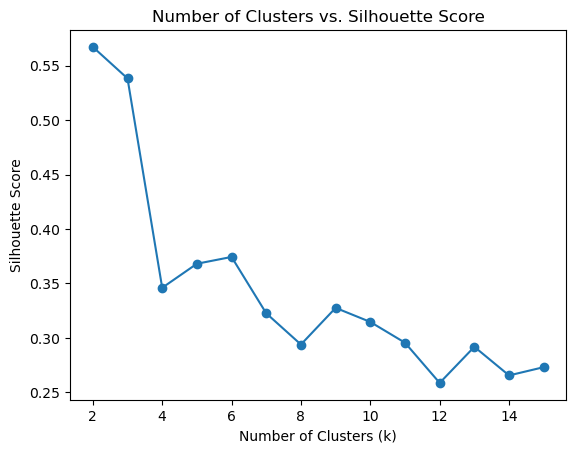

In [21]:
# plot the silhouette scores

# turn the list into a series for plotting
silhouette_series = pd.Series(silhouette_scores, index=range(2, 16))

# plot the data
silhouette_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score");

In [22]:
# h. fit two models with the number of clusters for the two highest silhouette scores and name the clusters
# fit a kmeans model with 2 clusters
kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans2.fit(data_scaled)

C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=42)

In [23]:
# data points within each cluster
Counter(kmeans2.labels_)

Counter({0: 437, 1: 3})

In [ ]:
# 2 clusters are not a great choice most of the datapoints are in a single cluster 

In [24]:
# fit a kmeans model with 3 clusters
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data_scaled)

C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=42)

In [25]:
# data points within each cluster
Counter(kmeans3.labels_)

Counter({2: 318, 0: 109, 1: 13})

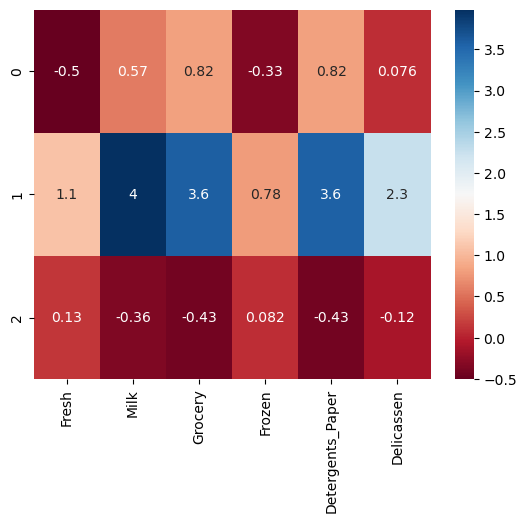

In [26]:
# view the cluster centers
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

In [ ]:
# Cluster 1 : high milk , Grocery and Detergents_Paper ( essential store )
# Cluster 2 : High Volume Distributed SKU Business
# Cluster 3 : Little of Everything

# 3. Hierarchical Clustering

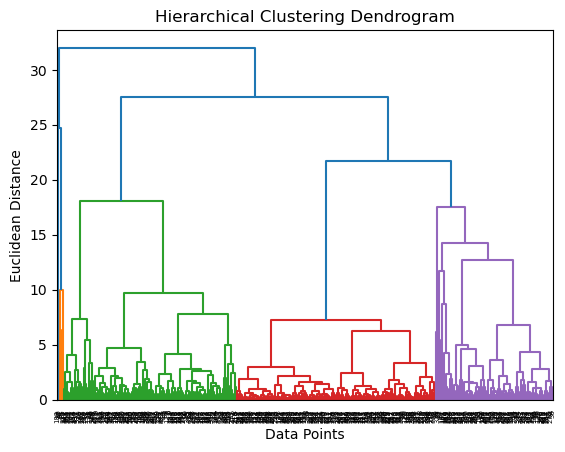

In [27]:
# a. Create a dendrogram using the scaled data
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data_scaled, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=20)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [ ]:
# b. Visually identify the number of clusters and update the color threadshold, if necessary: there seem to be 5 clusters

In [28]:
# c. Fit an agglomerative clustering model on the scaled data set with the "best" clusters and view the number of data points in each cluster
from sklearn.cluster import AgglomerativeClustering

agg5 = AgglomerativeClustering(5)
agg5.fit(data_scaled)

Counter(agg5.labels_)

Counter({4: 177, 0: 153, 2: 104, 1: 5, 3: 1})

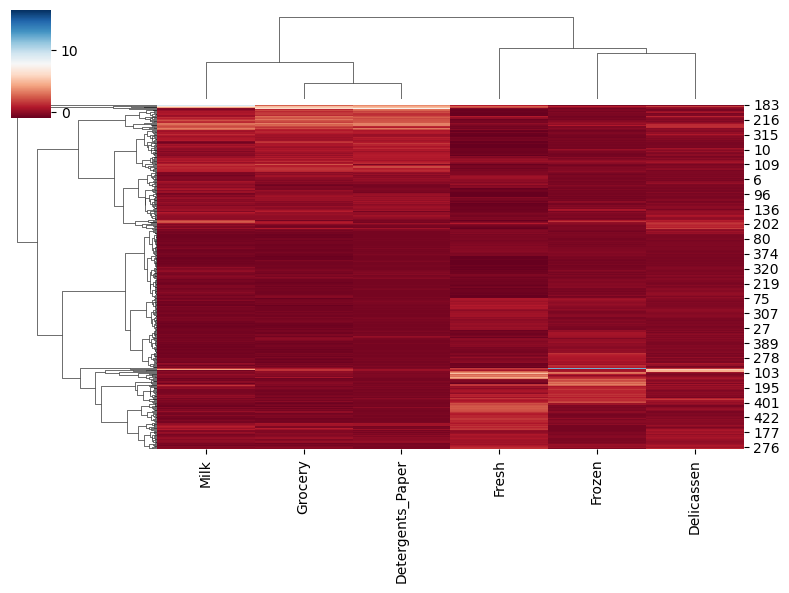

In [29]:
# d. Create a cluster map of the model you just fit
sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data_scaled.columns)
plt.show()

In [ ]:
# Color map doesn't help to differentiate , lets explore row level standardization

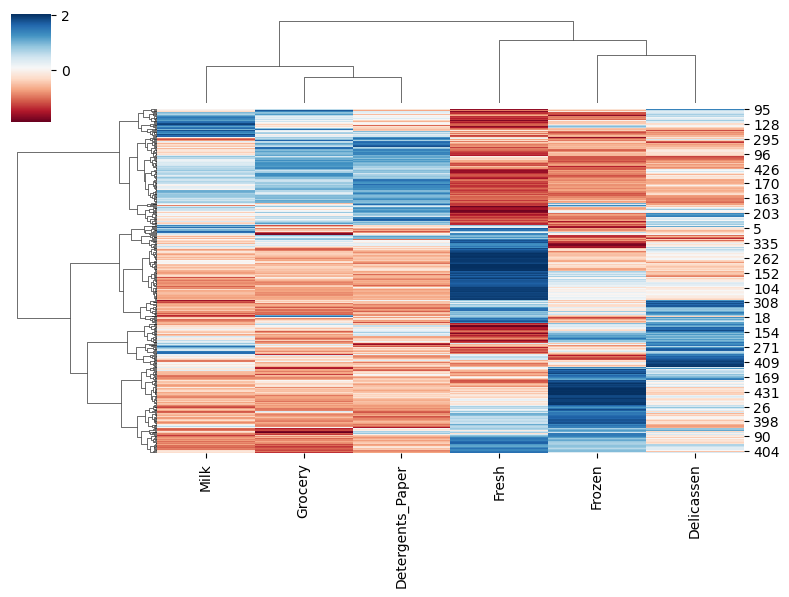

In [30]:
# e. Extra credit: within the clustermap function, add z_score=0 (scales data by row), see what happens and interpret the clusters
sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data_scaled.columns, z_score=0)
plt.show()

In [31]:
# update scaled dataframe so that each row has a mean of 0 and standard deviation of 1

# calculate mean and standard deviation for each row
row_means = data_scaled.mean(axis=1)
row_stds = data_scaled.std(axis=1)

# divide each element in the row by the standard deviation
data_zscore = data_scaled.sub(row_means, axis=0).div(row_stds, axis=0)
data_zscore.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.226470,1.554663,-0.038946,-1.586185,-0.045871,-0.110132
1,-1.285281,1.515302,0.395561,-0.922651,0.144427,0.152640
2,-0.838979,0.048198,-0.404631,-0.518050,-0.237279,1.950740
3,0.417555,-1.050725,-0.582252,1.607848,-0.796394,0.403969
4,0.846251,-0.619745,-0.664022,-0.248161,-0.914577,1.600254


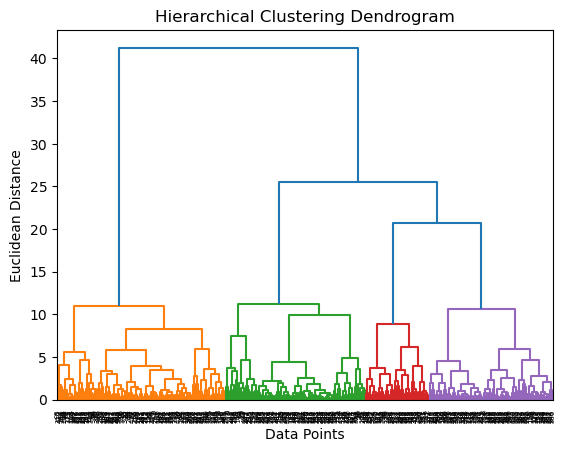

In [33]:
# update the dendrogram
linkage_matrix_zscore = linkage(data_zscore, method='ward')
dendrogram_info_zscore = dendrogram(linkage_matrix_zscore, color_threshold=15)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [34]:
# check if the cluster map data points match the dendrogram
data_points = pd.Series(dendrogram_info['ivl'], name='Data Point').astype('int')
data_points.head()

0    183
1     86
2     47
3     61
4     85
Name: Data Point, dtype: int32

In [35]:
# check if the cluster map data points match the dendrogram
data_points_zscore = pd.Series(dendrogram_info_zscore['ivl'], name='Data Point').astype('int')
data_points_zscore.head()

0     95
1    317
2    430
3    184
4    266
Name: Data Point, dtype: int32

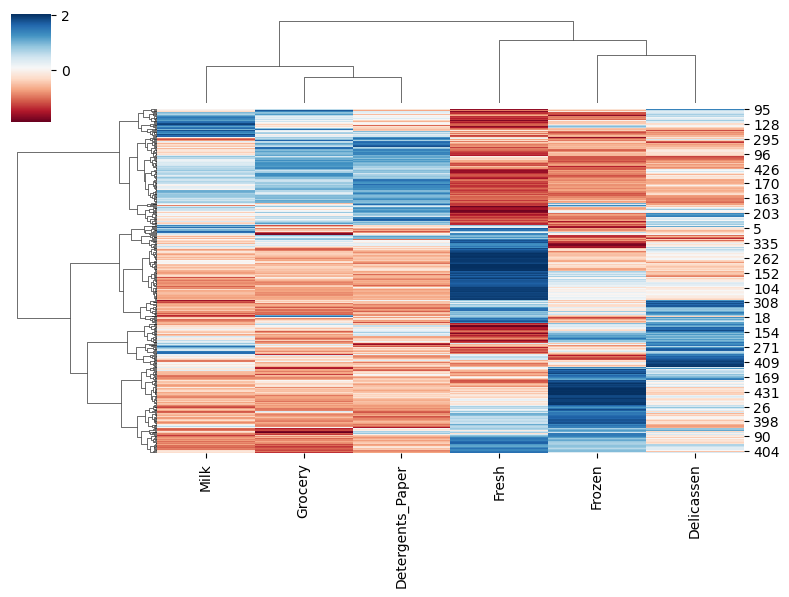

In [36]:
# cluster map 1: data scaled and z_score = 0
sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data_scaled.columns, z_score=0)
plt.show()

In [ ]:
# Cluster 1 : Less Fresh Items
# Cluster 2 : More Fresh Items
# Cluster 3 : More of Delicassen
# Cluster 4 : More of Frozen

In [37]:
# update the agg model with the cluster number and new data set
agg4_zscore = AgglomerativeClustering(4)
agg4_zscore.fit(data_zscore)

Counter(agg4_zscore.labels_)

Counter({1: 149, 0: 125, 2: 110, 3: 56})

In [38]:
# f. Extra credit: Write a loop to view the silhouette score for 2 to 20 clusters
agg_silhouette_scores = {}

for n in range(2, 21):
    agg_n = AgglomerativeClustering(n)
    agg_n.fit(data_scaled)
    agg_ss = silhouette_score(data_scaled, agg_n.labels_, metric='euclidean', sample_size=None)
    agg_silhouette_scores[n] = agg_ss

agg_silhouette_scores

{2: 0.7924572758342273,
 3: 0.2646091480214908,
 4: 0.2670148241989557,
 5: 0.23988371669170097,
 6: 0.23424990872738188,
 7: 0.24405686464597856,
 8: 0.2520384687343341,
 9: 0.27202620570114383,
 10: 0.27954261064916225,
 11: 0.28015398902140587,
 12: 0.24562381160303043,
 13: 0.24647695283235932,
 14: 0.22903049767293357,
 15: 0.2308407937114372,
 16: 0.18896719179943278,
 17: 0.1959949281863608,
 18: 0.1954950889983609,
 19: 0.20219343087967662,
 20: 0.20160566549699505}

In [39]:
# Fit a model with the number of clusters for the highest silhouette score
agg2 = AgglomerativeClustering(2)
agg2.fit(data_scaled)

Counter(agg2.labels_)

Counter({0: 434, 1: 6})

In [ ]:
# Not a good choice , most of the data points are in the 1st cluster 
# better to go with 4 clusters

# DBSCAN

In [40]:
# a. Copy over the tune_dbscan function from the demo code
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score (excluding noise points)
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [41]:
# b. Apply the dbscan function on the scaled data
dbscan_results = tune_dbscan(data_scaled)
dbscan_results.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,8,423,-0.393
1,0.1,3,1,437,NaN
2,0.1,4,0,440,NaN
3,0.1,5,0,440,NaN
4,0.1,6,0,440,NaN


In [42]:
# c. Sort the data by highest silhouette score
dbscan_results.sort_values(by='Silhouette Score', ascending=False)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
136,1.8,2,2,13,0.581583
122,1.6,4,2,24,0.578543
97,1.3,3,3,25,0.424572
96,1.3,2,3,25,0.424572
105,1.4,3,3,23,0.423547
...,...,...,...,...,...
147,1.9,5,1,15,NaN
148,1.9,6,1,18,NaN
149,1.9,7,1,18,NaN
150,1.9,8,1,19,NaN


In [43]:
# d. Notice that the top eps value is close to 2, so update the function to test eps values up to 5 (instead of 2)
def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 5, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score (excluding noise points)
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [44]:
# e. Try applying the function again and view the top silhouette scores
dbscan_results2 = tune_dbscan(data_scaled)
dbscan_results2.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,8,423,-0.393
1,0.1,3,1,437,NaN
2,0.1,4,0,440,NaN
3,0.1,5,0,440,NaN
4,0.1,6,0,440,NaN


In [45]:
# view the top silhouette scores
dbscan_results2.sort_values(by='Silhouette Score', ascending=False)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
272,3.5,2,2,8,0.740284
264,3.4,2,2,8,0.740284
256,3.3,2,2,8,0.740284
248,3.2,2,2,8,0.740284
224,2.9,2,2,10,0.582247
...,...,...,...,...,...
387,4.9,5,1,5,NaN
388,4.9,6,1,5,NaN
389,4.9,7,1,5,NaN
390,4.9,8,1,6,NaN


In [46]:
# view one result for each silhouette score value
(dbscan_results2.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head(10)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
272,3.5,2,2,8,0.740284
224,2.9,2,2,10,0.582247
136,1.8,2,2,13,0.581583
122,1.6,4,2,24,0.578543
232,3.0,2,3,8,0.577890
96,1.3,2,3,25,0.424572
105,1.4,3,3,23,0.423547
113,1.5,3,3,21,0.421271
89,1.2,3,2,32,0.419507
81,1.1,3,2,40,0.417466


In [47]:
# f. Fit a DBSCAN model on the scaled data set with the best eps + min_samples values and view the number of data points in each cluster
dbscan2 = DBSCAN(eps=3.5, min_samples=2)
dbscan2.fit(data_scaled)

DBSCAN(eps=3.5, min_samples=2)

In [48]:
# number of data points in each cluster
Counter(dbscan2.labels_)

Counter({0: 430, -1: 8, 1: 2})

In [ ]:
# not a good choice , most of the points are in the same cluster

In [49]:
# Fit a DBSCAN model on the scaled data set with the eps = 3 , min_samples = 2  and view the number of data points in each cluster
dbscan3 = DBSCAN(eps=3, min_samples=2)
dbscan3.fit(data_scaled)

DBSCAN(eps=3, min_samples=2)

In [50]:
# number of data points in each cluster
Counter(dbscan3.labels_)

Counter({0: 428, -1: 8, 1: 2, 2: 2})

In [ ]:
# DBSCAN not a good choice

# 5. Compare Clustering Algorithms

In [ ]:
# Kmeans with 3 clusters
# Kmeans with 5 clusters
# Hierarchical with 4 clusters
# Hierarchical with 2 clusters


In [51]:
def print_metrics(model, data):
    print(model)
    print(Counter(model.labels_))
    print(silhouette_score(data, model.labels_))

In [52]:
print_metrics(kmeans3, data_scaled) # differentiated, simple and interpretable

KMeans(n_clusters=3, n_init='auto', random_state=42)
Counter({2: 318, 0: 109, 1: 13})
0.33391714199926514


In [53]:
print_metrics(kmeans5, data_scaled) # good model

KMeans(n_clusters=5, n_init='auto', random_state=42)
Counter({2: 269, 0: 96, 4: 63, 1: 11, 3: 1})
0.3663027726916198


In [55]:
print_metrics(agg4_zscore, data_scaled) # descent model

AgglomerativeClustering(n_clusters=4)
Counter({1: 149, 0: 125, 2: 110, 3: 56})
0.13090481575780477


In [56]:
print_metrics(agg2, data_scaled) # very few differentiated points

AgglomerativeClustering()
Counter({0: 434, 1: 6})
0.7924572758342273


In [57]:
print_metrics(dbscan2, data_scaled) # very few differentiated points

DBSCAN(eps=3.5, min_samples=2)
Counter({0: 430, -1: 8, 1: 2})
0.740283564230615


# Recommend Client Segment

In [ ]:
# i will choose Kmeans3 over kmeans5 since its bit more interpretable

In [58]:
# a. With the top model as the K-Means model with 3 clusters, review the results again
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data_scaled)

C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=42)

In [60]:
# data points within each cluster
Counter(kmeans3.labels_)

Counter({2: 318, 0: 109, 1: 13})

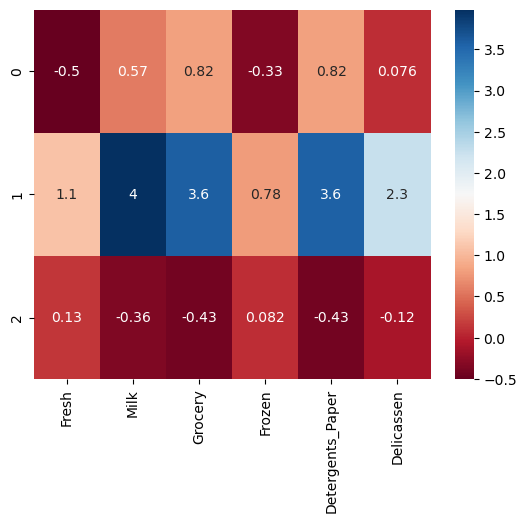

In [61]:
# view the cluster centers
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

In [ ]:
# Cluster 1 : Essential Store ( milk , Grocery and Detergents_paper )
# Cluster 2 : More of everything
# Cluster 3 : Less of everything

In [ ]:
# b. Clearly state what you would recommend as client segments and how you would better support those clients

# Predict the cluster of a new client

In [62]:
# a. Given this new client, determine which cluster they fall into
new_client = pd.DataFrame([np.array([15000, 15000, 30000, 500, 15000, 2000])], columns=data.columns)
new_client

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,15000,15000,30000,500,15000,2000


In [63]:
# b. Scale the new client data using the same scaler object from the Data Prep step
new_client_scaled = pd.DataFrame(scaler.transform(new_client), columns=data.columns)
new_client_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.237451,1.248474,2.322787,-0.530388,2.544604,0.168671


In [64]:
# c. Make a prediction using the K-Means model with 3 clusters
kmeans3.predict(new_client_scaled)

array([0])

In [ ]:
# d. Which cluster does the new client belong to? Cluster 1 : essential store